<a href="https://colab.research.google.com/github/ramin40/ASL-recognition-with-CNN/blob/main/ASL_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing necessery libraries

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
np.random.seed(123)
from glob import glob
import skimage
from skimage import io
from pathlib import Path
import string
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from skimage import transform
ss=StandardScaler()

importing data

In [ ]:
pictures=[]
targets=[]
def reading_data(folder_path):
  letters=list(string.ascii_uppercase)+['del','nothing','space']
  for letter in letters:
    patth=folder_path+'/'+letter
    picts=glob(patth+'/*.jpg')
    for picture in picts:
      image=io.imread(picture)
      if image.shape==(200,200,3):
        image=skimage.color.rgb2gray(image)
        image=np.array(image)
        path=Path(picture)
        targets.append(path.stem[0])
        image=image.tolist()
        pictures.append(image)
reading_data('/content/drive/MyDrive/asl-alphabet-test')



saving data

In [ ]:
#shuffling data
c=list(zip(pictures,targets))
np.random.shuffle(c)
shuffled_pictures,shuffled_targets=zip(*c)
x=np.array(shuffled_pictures)
#saving data
import pickle
with open('ASL gray image in numpy format','wb') as f:
  pickle.dump(np.array(shuffled_pictures),f)
with open('targets of ASL','wb') as t:
  pickle.dump(shuffled_targets,t)

In [2]:
x=pd.read_pickle('/content/drive/MyDrive/datasets /ASL gray image in numpy format')
y=pd.read_pickle('/content/drive/MyDrive/datasets /targets of ASL')

incpecting data

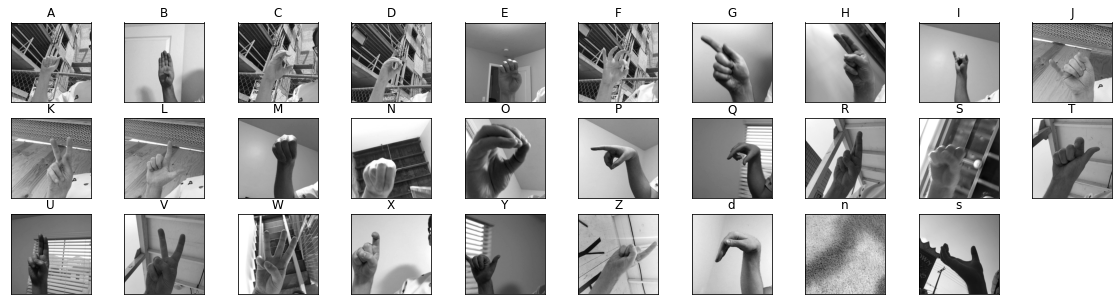

In [8]:
image_dict=dict(zip(y,x))
fig=plt.figure(figsize=(20,5))
letters=list(string.ascii_uppercase)+['d','n','s']
for i in range(len(letters)):
  ax=fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(image_dict[letters[i]],cmap='gray')
  ax.set_title(letters[i])
plt.show()

on-hot encoding for target variable+ splitting data

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
encoded_y=label_encoder.fit_transform(y)
oh_y=np_utils.to_categorical(encoded_y)
from sklearn.model_selection import train_test_split
x=x.reshape(-1,200,200,1)
xtrain,xtest,ytrain,ytest=train_test_split(x,oh_y,random_state=42,test_size=0.2)


binary encoding

In [ ]:
pip install category_encoders

In [ ]:
from category_encoders import BinaryEncoder
binary_encoder=BinaryEncoder(cols=['labels'])
y=pd.DataFrame({'labels':y})
binary_encoded=binary_encoder.fit_transform(y)
from sklearn.model_selection import train_test_split
x=x.reshape(-1,200,200,1)
xtrain,xtest,ytrain,ytest=train_test_split(x,binary_encoded,random_state=42,test_size=0.2)


buildind a model

In [17]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(200,200,1),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(6,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 32)       

training model

In [18]:
conv_model=model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest),batch_size=32,)

Epoch 1/100
22/22 [==============================] - 5s 85ms/step - loss: 0.6476 - accuracy: 0.2033 - val_loss: 0.5922 - val_accuracy: 0.0345
Epoch 2/100
22/22 [==============================] - 1s 35ms/step - loss: 0.5982 - accuracy: 0.1615 - val_loss: 0.5839 - val_accuracy: 0.0345
Epoch 3/100
22/22 [==============================] - 1s 32ms/step - loss: 0.5889 - accuracy: 0.1824 - val_loss: 0.5836 - val_accuracy: 0.0632
Epoch 4/100
22/22 [==============================] - 1s 32ms/step - loss: 0.5790 - accuracy: 0.1879 - val_loss: 0.5686 - val_accuracy: 0.2471
Epoch 5/100
22/22 [==============================] - 1s 32ms/step - loss: 0.5669 - accuracy: 0.2028 - val_loss: 0.5731 - val_accuracy: 0.2414
Epoch 6/100
22/22 [==============================] - 1s 32ms/step - loss: 0.5593 - accuracy: 0.2882 - val_loss: 0.5780 - val_accuracy: 0.1839
Epoch 7/100
22/22 [==============================] - 1s 31ms/step - loss: 0.5521 - accuracy: 0.3037 - val_loss: 0.5636 - val_accuracy: 0.1609
Epoch 

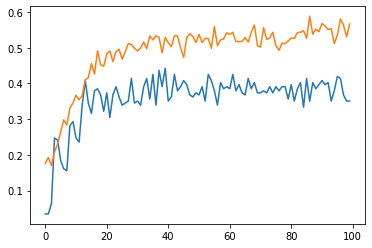

In [19]:
pd.Series(conv_model.history['val_accuracy']).plot()
pd.Series(conv_model.history['accuracy']).plot()

In [20]:
model.evaluate(xtest,ytest)

6/6 [==============================] - 0s 13ms/step - loss: 0.6556 - accuracy: 0.3506


[0.6555594801902771, 0.35057470202445984]